### 1. Business Understanding:

In this notebook we will dos some data exploration of the Airbnb market in Seattle.

##### 1. What are the major factors that influence the price of an Airbnb rental in Seattle?

##### 2. What are the some of the popular amenities that are offered in the Airbnb rentals in Seattle?

##### 3. Which neighborhoods in Seattle have the highest and lowest rental prices??

##### 4. What are the number of Airbnb rental listings in the different neighborhoods  of Seattle?

##### 5. What are the most expensive and least expensive months for the Airbnb rentals in Seattle?



### 2. Data Understanding



Import the necessary Python packages and load the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, fbeta_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\anaconda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
calendar = pd.read_csv('./data/calendar.csv')
listing = pd.read_csv('./data/listings.csv')
review = pd.read_csv('./data/reviews.csv')

In [3]:
print("Calendar:",calendar.shape)
print("Review:",review.shape)
print("Listing:",listing.shape)


Calendar: (1393570, 4)
Review: (84849, 6)
Listing: (3818, 92)


In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### 3. Question 1:   What are the major factors that influence the price of an Airbnb rental in Seattle?


Let's set up the data to answer the first question. Out of the 3 datasets: listings is the one relevant to our analysis and the review dataset consists of text data.   

Data exploration to find out how many columns are missing  50, 75 of  missing  values

In [8]:
set(listing.columns[listing.isnull().mean() > 0.50])#Provide a set of columns with more than 50% of the values missing


{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [9]:
set(listing.columns[listing.isnull().mean() > 0.75])#Provide a set of columns with more than 75% of the values missing


{'license', 'square_feet'}

Our response variable is price. Checking to see if there are any null values.

In [10]:
listing['price'].isnull().sum() # Good thing no null values

0

### 4. Data Preparation



In [11]:
df = listing.copy() # df - This is our main dataset that we will be using for modeling

First checking all the numeric columns

In [12]:
num_df = listing.select_dtypes(include=['int64', 'float64'])

In [13]:
num_df.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [14]:
[col for col in num_df.columns.values if num_df[col].nunique()==1]

['scrape_id']

Dropping the columns square_feet and license as they have more  than 75 percent of the values missing

In [15]:
df.drop(columns=['square_feet', 'license'], inplace=True) # Dropping columns with more than 75% of the values missing

Dropping the columns scrape_id as it is only one unique value and that will not help us with model predictions

In [16]:
df.drop( columns=['scrape_id'], inplace=True) # this has a unique value and will not help in the model becuase there is no variability in the data

Next, checking the non numeric columns 


In [17]:
cat_df = listing.select_dtypes(include=['object']).copy()

In [18]:
cat_df.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [19]:
cat_df.head()

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


Dropping features with data in the form of text and sentences, e.g. name, summary, the various url columns, street, notes and other columns from both the df and the cat_df data frames

In [20]:
df.drop( columns=['listing_url', 'last_scraped', 'name', 'summary', 'space', 'experiences_offered', 'neighborhood_overview'], inplace=True) 
cat_df.drop( columns=['listing_url', 'last_scraped', 'name', 'summary', 'space', 'experiences_offered', 'neighborhood_overview'], inplace=True)  

In [21]:
df.drop( columns=['description', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since'], inplace=True) 
cat_df.drop( columns=['description', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since'], inplace=True) 

In [22]:
df.drop( columns=['host_location', 'host_about',  'host_thumbnail_url',  'host_picture_url',  'calendar_last_scraped', 'first_review', 'last_review'], inplace=True) 
cat_df.drop( columns=['host_location', 'host_about',  'host_thumbnail_url',  'host_picture_url',  'calendar_last_scraped', 'first_review', 'last_review'], inplace=True) 

In [23]:
df.drop( columns=['host_neighbourhood', 'street',  'jurisdiction_names'], inplace=True) 
cat_df.drop( columns=['host_neighbourhood', 'street',  'jurisdiction_names'], inplace=True) 

In [24]:
df.head()

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,956883,within a few hours,96%,100%,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,5177328,within an hour,98%,100%,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,16708587,within a few hours,67%,100%,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,9851441,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,278830,1452570,within an hour,100%,NaN,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [25]:
df.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_clean

There are a lot of columns with regard to location. Dropping the city, state, latitude and longitude as neighborhood will give us the same information.

In [26]:
df.drop(columns=['city','state','smart_location','latitude','longitude'], inplace=True) 
cat_df.drop(columns=['city','state','smart_location'], inplace=True) 

Need to decide on the neighborhood column. Checking the neighborhood features

In [27]:
df['neighbourhood'].isnull().sum()

416

In [28]:
df[ 'neighbourhood'].nunique()

81

In [29]:
df['neighbourhood_cleansed'].isnull().sum()

0

In [30]:
df['neighbourhood_cleansed'].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [31]:
df[ 'neighbourhood_group_cleansed'].nunique()       

17

In [32]:
df['neighbourhood_cleansed'].isnull().sum()

0

In [33]:
df['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

After examining all the neighborhood columns I decided to keep just the neighborhood_group_cleansed as it gives the information as it has already grouped the data for us as thus provides less number of levels as a categorical variable.

In [34]:
df.drop(columns=['neighbourhood_cleansed', 'neighbourhood'], inplace=True) 

Checking out zipcode now

In [35]:
df['zipcode'].unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

Cleaning up some messed up data in the zipcode column


In [36]:
df['zipcode'] = df['zipcode'].replace('99\n98122', '98122')
df['zipcode'].unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '98121', '98102', '98199',
       '98104', '98134', '98136', '98126', '98146', '98116', '98177',
       '98118', '98108', '98133', '98106', '98178', '98125'], dtype=object)

Checking to see what other columns have more than 25 percent of the values missing.

In [37]:
set(df.columns[df.isnull().mean() > 0.25])

{'cleaning_fee', 'monthly_price', 'security_deposit', 'weekly_price'}

As we already have the price column that is populated dropping the montly_price and weekly_price columns

In [38]:
df.drop( columns=['monthly_price',  'weekly_price'], inplace=True) # as we have the price column

In [39]:
unique_count = [(col,df[col].nunique()) for col in df.columns.values]

In [40]:
[t[0] for t in unique_count if t[1] == 1]

['market', 'country_code', 'country', 'has_availability', 'requires_license']

Dropping the 'market', 'country_code', 'country', 'has_availability', 'requires_license' as they have only one unique value and will not help the predictive power of the model

In [41]:
df.drop( columns=['market', 'country_code', 'country', 'has_availability', 'requires_license'], inplace=True) # Unique values  will not help in the model
cat_df.drop( columns=['market', 'country_code', 'country', 'has_availability', 'requires_license'], inplace=True) 


In [42]:
df['host_response_rate']  = df['host_response_rate'].replace('%', '', regex=True).astype(float)
df['host_acceptance_rate']  = df['host_acceptance_rate'].replace('%', '', regex=True).astype(float)


In [43]:
df['host_acceptance_rate'].value_counts()

100.0    3044
0.0         1
Name: host_acceptance_rate, dtype: int64

In [44]:
df['host_acceptance_rate'].isnull().sum()

773

Dropping the host_acceptance_rate column as nearly all the data is the same

In [45]:
df.drop( columns=['host_acceptance_rate'], inplace=True) 
cat_df.drop( columns=['host_acceptance_rate'], inplace=True) 

In [46]:
unique_count = [(col,cat_df[col].nunique()) for col in cat_df.columns.values]
[t[0] for t in unique_count if t[1] < 30]

['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'zipcode',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

### 5. Encoding for Categorical variables 



Using pandas get_dummies to do OneHot Encoding of the categorical variables.

In [47]:
cols=['host_response_time', 'host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
             'room_type','instant_bookable','require_guest_profile_picture','require_guest_phone_verification',
'neighbourhood_group_cleansed','zipcode','property_type','bed_type','cancellation_policy']

df=pd.get_dummies(data=df, columns=cols,drop_first=True)

In [48]:
df.head()

,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,accommodates,bathrooms,bedrooms,beds,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,241032,956883,96.0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,1,0
1,953595,5177328,98.0,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,1
2,3308979,16708587,67.0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",11,4.5,5.0,7.0,...,0,0,0,0,0,0,0,1,0,1
3,7421966,9851441,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",3,1.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4,278830,1452570,100.0,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",6,2.0,3.0,3.0,...,0,0,0,0,0,0,0,1,0,1


### 6. Processing 'host_verification and 'amenities' variables 



In [49]:
 df['host_verifications'].head()

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object

Special processing is needed for the host_verifications column as the column contains a list of values. I used MultiLabelBinarizer for this task.

In [50]:
mlb = MultiLabelBinarizer()
host_ver_df = pd.DataFrame(mlb.fit_transform(df['host_verifications'].astype(str).fillna('missing').str.strip('[]').str.replace("'", '').str.split(', ')),columns=mlb.classes_, index=df.index)

In [51]:
host_ver_df.head()


,,None,amex,email,facebook,google,jumio,kba,linkedin,manual_offline,manual_online,phone,photographer,reviews,sent_id,weibo
0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0
2,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0
3,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0
4,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0


In [52]:
host_ver_df.columns

Index(['', 'None', 'amex', 'email', 'facebook', 'google', 'jumio', 'kba',
       'linkedin', 'manual_offline', 'manual_online', 'phone', 'photographer',
       'reviews', 'sent_id', 'weibo'],
      dtype='object')

In [53]:
host_ver_df.drop(columns=[ '',  'None'], inplace=True) 

As this is the first time I used the MultiLabelBinarizer spot checking a few to make sure it did the encoding correctly

In [54]:
df['host_verifications'].iloc[0]

"['email', 'phone', 'reviews', 'kba']"

In [55]:
host_ver_df.iloc[0]

amex              0
email             1
facebook          0
google            0
jumio             0
kba               1
linkedin          0
manual_offline    0
manual_online     0
phone             1
photographer      0
reviews           1
sent_id           0
weibo             0
Name: 0, dtype: int32

Joining it back to the main dataframe and dropping the host_verifications column

In [56]:
df=df.join(host_ver_df,how='left')
df.drop(columns='host_verifications',inplace=True)
df.head(5)

,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,amenities,...,jumio,kba,linkedin,manual_offline,manual_online,phone,photographer,reviews,sent_id,weibo
0,241032,956883,96.0,3.0,3.0,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,0,1,0,0,0,1,0,1,0,0
1,953595,5177328,98.0,6.0,6.0,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,1,0,1,0,0,1,0,1,0,0
2,3308979,16708587,67.0,2.0,2.0,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,1,0,0,0,0,1,0,1,0,0
3,7421966,9851441,NaN,1.0,1.0,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",...,1,0,0,0,0,1,0,1,0,0
4,278830,1452570,100.0,2.0,2.0,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",...,0,1,0,0,0,1,0,1,0,0


Working on the amenities column now!

In [57]:
df['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [58]:
amenities_df=df['amenities'].str.split(',',expand=True)
amenities_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer},...,None,None,None,None,None,None,None,None,None,None
1,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""","""Pets Allowed""","""Pets live on this property""",Dog(s),...,Shampoo},None,None,None,None,None,None,None,None,None
3,{Internet,"""Wireless Internet""",Kitchen,"""Indoor Fireplace""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""",...,None,None,None,None,None,None,None,None,None,None
4,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""",...,None,None,None,None,None,None,None,None,None,None


In [59]:
amenities_df = amenities_df.replace('[^\w\s]','', regex=True) #Only whole words and spaces
amenities_df = amenities_df.replace(' ', '_', regex=True) # Replacing spaces with underscores
amenities_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,TV,Cable_TV,Internet,Wireless_Internet,Air_Conditioning,Kitchen,Heating,FamilyKid_Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wireless_Internet,Kitchen,Free_Parking_on_Premises,BuzzerWireless_Intercom,Heating,FamilyKid_Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,TV,Cable_TV,Internet,Wireless_Internet,Air_Conditioning,Kitchen,Free_Parking_on_Premises,Pets_Allowed,Pets_live_on_this_property,Dogs,...,Shampoo,None,None,None,None,None,None,None,None,None
3,Internet,Wireless_Internet,Kitchen,Indoor_Fireplace,Heating,FamilyKid_Friendly,Washer,Dryer,Smoke_Detector,Carbon_Monoxide_Detector,...,None,None,None,None,None,None,None,None,None,None
4,TV,Cable_TV,Internet,Wireless_Internet,Kitchen,Heating,FamilyKid_Friendly,Smoke_Detector,Carbon_Monoxide_Detector,First_Aid_Kit,...,None,None,None,None,None,None,None,None,None,None


In [60]:
amenities_df['combined']= amenities_df.values.tolist()
amenities_df['combined'].head()

0    [TV, Cable_TV, Internet, Wireless_Internet, Ai...
1    [TV, Internet, Wireless_Internet, Kitchen, Fre...
2    [TV, Cable_TV, Internet, Wireless_Internet, Ai...
3    [Internet, Wireless_Internet, Kitchen, Indoor_...
4    [TV, Cable_TV, Internet, Wireless_Internet, Ki...
Name: combined, dtype: object

In [61]:
mlb = MultiLabelBinarizer()
amenities_separate_df = pd.DataFrame(mlb.fit_transform(amenities_df['combined'].astype(str).fillna('missing').str.strip('[]').str.replace("'", '').str.split(', ')),columns=mlb.classes_, index=df.index)

In [62]:
amenities_separate_df.head()

,,24Hour_Checkin,Air_Conditioning,Breakfast,BuzzerWireless_Intercom,Cable_TV,Carbon_Monoxide_Detector,Cats,Dogs,Doorman,...,Safety_Card,Shampoo,Smoke_Detector,Smoking_Allowed,Suitable_for_Events,TV,Washer,Washer__Dryer,Wheelchair_Accessible,Wireless_Internet
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,0,0,1,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [63]:
amenities_separate_df.columns

Index(['', '24Hour_Checkin', 'Air_Conditioning', 'Breakfast',
       'BuzzerWireless_Intercom', 'Cable_TV', 'Carbon_Monoxide_Detector',
       'Cats', 'Dogs', 'Doorman', 'Dryer', 'Elevator_in_Building',
       'Essentials', 'FamilyKid_Friendly', 'Fire_Extinguisher',
       'First_Aid_Kit', 'Free_Parking_on_Premises', 'Gym', 'Hair_Dryer',
       'Hangers', 'Heating', 'Hot_Tub', 'Indoor_Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop_Friendly_Workspace', 'Lock_on_Bedroom_Door', 'None',
       'Other_pets', 'Pets_Allowed', 'Pets_live_on_this_property', 'Pool',
       'Safety_Card', 'Shampoo', 'Smoke_Detector', 'Smoking_Allowed',
       'Suitable_for_Events', 'TV', 'Washer', 'Washer__Dryer',
       'Wheelchair_Accessible', 'Wireless_Internet'],
      dtype='object')

In [64]:
amenities_separate_df.drop(columns=[ '',  'None'], inplace=True) 

Spot checking just to make sure it worked the multilabel binarizer worked correctly

In [65]:
df['amenities'].iloc[3000]

'{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly","Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Shampoo}'

In [66]:
amenities_separate_df.iloc[3000]

24Hour_Checkin                0
Air_Conditioning              0
Breakfast                     0
BuzzerWireless_Intercom       0
Cable_TV                      1
Carbon_Monoxide_Detector      1
Cats                          0
Dogs                          0
Doorman                       0
Dryer                         0
Elevator_in_Building          0
Essentials                    1
FamilyKid_Friendly            1
Fire_Extinguisher             1
First_Aid_Kit                 1
Free_Parking_on_Premises      1
Gym                           0
Hair_Dryer                    0
Hangers                       0
Heating                       1
Hot_Tub                       0
Indoor_Fireplace              0
Internet                      0
Iron                          0
Kitchen                       1
Laptop_Friendly_Workspace     0
Lock_on_Bedroom_Door          0
Other_pets                    0
Pets_Allowed                  0
Pets_live_on_this_property    0
Pool                          0
Safety_C

Joining with the main dataframe and dropping the column

In [67]:
df=df.join(amenities_separate_df,how='left')
df.drop(columns='amenities',inplace=True)
df.head(5)

,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,Safety_Card,Shampoo,Smoke_Detector,Smoking_Allowed,Suitable_for_Events,TV,Washer,Washer__Dryer,Wheelchair_Accessible,Wireless_Internet
0,241032,956883,96.0,3.0,3.0,4,1.0,1.0,1.0,$85.00,...,0,0,0,0,0,1,1,0,0,1
1,953595,5177328,98.0,6.0,6.0,4,1.0,1.0,1.0,$150.00,...,1,0,1,0,0,1,1,0,0,1
2,3308979,16708587,67.0,2.0,2.0,11,4.5,5.0,7.0,$975.00,...,0,1,1,0,0,1,1,0,0,1
3,7421966,9851441,NaN,1.0,1.0,3,1.0,0.0,2.0,$100.00,...,1,1,1,0,0,0,1,0,0,1
4,278830,1452570,100.0,2.0,2.0,6,2.0,3.0,3.0,$450.00,...,0,1,1,0,0,1,0,0,0,1


Fixing the price column by removing the $ sign and changing it to float

In [68]:
df['price']  = df['price'].map(lambda x: float(x[1:-3].replace(",", "")))


In [69]:
df['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

Checking the columns that have null values

In [70]:
set(df.columns[df.isnull().mean() > 0])

{'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'host_listings_count',
 'host_response_rate',
 'host_total_listings_count',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month',
 'security_deposit'}

Checking to see if there are any string columns that I have missed

In [71]:
df_object = df.select_dtypes(include=['object'])

In [72]:
df_object.head()

,security_deposit,cleaning_fee,extra_people,calendar_updated
0,NaN,NaN,$5.00,4 weeks ago
1,$100.00,$40.00,$0.00,today
2,"$1,000.00",$300.00,$25.00,5 weeks ago
3,NaN,NaN,$0.00,6 months ago
4,$700.00,$125.00,$15.00,7 weeks ago


In [73]:
df['calendar_updated'].nunique()

34

In [74]:
df.drop( columns=['calendar_updated'], inplace=True) 
cat_df.drop( columns=['calendar_updated'], inplace=True) 

Cleaning up cleaning_fee, security_deposit and extra_people

In [75]:
df['cleaning_fee']  = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

In [76]:
df['security_deposit']  = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)

In [77]:
df['extra_people']  = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)

Filling 0 for the missing values of security_deposit, cleaning_fee and extra_people as I am assuming that there is no charge.

In [78]:
df['security_deposit'] = df['security_deposit'].fillna(0) # Assuming that null means no security deposit

In [79]:
df['cleaning_fee']=df['cleaning_fee'].fillna(0)  # Assuming that null means no cleaning fee

In [80]:
df['extra_people']=df['cleaning_fee'].fillna(0)

In [81]:
df.head()

,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,Safety_Card,Shampoo,Smoke_Detector,Smoking_Allowed,Suitable_for_Events,TV,Washer,Washer__Dryer,Wheelchair_Accessible,Wireless_Internet
0,241032,956883,96.0,3.0,3.0,4,1.0,1.0,1.0,85.0,...,0,0,0,0,0,1,1,0,0,1
1,953595,5177328,98.0,6.0,6.0,4,1.0,1.0,1.0,150.0,...,1,0,1,0,0,1,1,0,0,1
2,3308979,16708587,67.0,2.0,2.0,11,4.5,5.0,7.0,975.0,...,0,1,1,0,0,1,1,0,0,1
3,7421966,9851441,NaN,1.0,1.0,3,1.0,0.0,2.0,100.0,...,1,1,1,0,0,0,1,0,0,1
4,278830,1452570,100.0,2.0,2.0,6,2.0,3.0,3.0,450.0,...,0,1,1,0,0,1,0,0,0,1


The columns id and host_id are not going to help with the model prediction so dropping it

In [82]:
df.drop( columns=['id', 'host_id'], inplace=True) 

In [83]:
df.head()

,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,Safety_Card,Shampoo,Smoke_Detector,Smoking_Allowed,Suitable_for_Events,TV,Washer,Washer__Dryer,Wheelchair_Accessible,Wireless_Internet
0,96.0,3.0,3.0,4,1.0,1.0,1.0,85.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
1,98.0,6.0,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,...,1,0,1,0,0,1,1,0,0,1
2,67.0,2.0,2.0,11,4.5,5.0,7.0,975.0,1000.0,300.0,...,0,1,1,0,0,1,1,0,0,1
3,NaN,1.0,1.0,3,1.0,0.0,2.0,100.0,0.0,0.0,...,1,1,1,0,0,0,1,0,0,1
4,100.0,2.0,2.0,6,2.0,3.0,3.0,450.0,700.0,125.0,...,0,1,1,0,0,1,0,0,0,1


### 7. Model Data



In [84]:
y = df['price'].copy()

In [85]:
X = df.drop('price', axis = 1)

In [86]:
print(X.shape)

(3818, 157)


Used median to impute the missing values. 

In [87]:
impute = Imputer(strategy='median')
X_impute = impute.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_impute, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

Used the code from FindingDonors Udacity Term 1 project

In [89]:

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute mse on the first 300 training samples which is y_train[:300]
    results['mse_train'] = mean_squared_error(y_train[:300], predictions_train)
        
    # TODO: Compute mse on test set using accuracy_score()
    results['mse_test'] = mean_squared_error(y_test, predictions_test)
    
    
       
    # Success
    print("----------------------------------")
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print("MSE_train:" , results['mse_train'])
    print("MSE_test:", results['mse_test']) 
    print("Training score:%.6f" % learner.score(X_train,y_train))
    print("Test score:%.6f" % learner.score(X_test,y_test))
    # Return the results
    return results

As I am looking for interpretation and feature importances decided to try Linear Regression , Decision trees and Random Forest Regressor


In [90]:

# TODO: Initialize the three models
clf_A = LinearRegression()
clf_B = DecisionTreeRegressor()
clf_C = RandomForestRegressor(random_state=42)



# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(X_train)
samples_10 = int(samples_100/10)
samples_1 = int(samples_100/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)



----------------------------------
LinearRegression trained on 30 samples.
MSE_train: 16005.854228425213
MSE_test: 9584.918194105485
Training score:-4.723578
Test score:-0.180946
----------------------------------
LinearRegression trained on 305 samples.
MSE_train: 2220.9524535472715
MSE_test: 3.684744025380674e+16
Training score:-1793095069971.551758
Test score:-4539928036407.902344
----------------------------------
LinearRegression trained on 3054 samples.
MSE_train: 3689.1953681561454
MSE_test: 3066.2290105853176
Training score:0.626929
Test score:0.622214
----------------------------------
DecisionTreeRegressor trained on 30 samples.
MSE_train: 10625.27
MSE_test: 11728.990837696336
Training score:-0.514511
Test score:-0.445115
----------------------------------
DecisionTreeRegressor trained on 305 samples.
MSE_train: 0.0
MSE_test: 9848.382198952879
Training score:-0.129588
Test score:-0.213407
----------------------------------
DecisionTreeRegressor trained on 3054 samples.
MSE_tr

Decided to go with the LinearRegression as it's MSE and  test score was better than the others

In [91]:
print(X.columns.tolist())


['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour', 'host_is_superhost_t', 'host_has_profile_pic_t', 'host_identity_verified_t', 'is_location_exact_t', 'room_type_Private room', 'room_type_Shared room', 'instant_bookable_t', 'require_guest_profile_picture_t', 'require_guest_phone_verification_t', 'neighbourhood_group_cleansed_Beacon Hill', 'neighbourhood_group_cleansed

In [92]:
regr = LinearRegression()
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
y_hat = regr.predict(X_test)

## evaluate on test data
r2 = r2_score(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

print("======= Result =======")
print("> test r-squared: {:.4f}".format(r2))
print("> test RMSE: {:.4f}".format(rmse))

======= Result =======
> test r-squared: 0.6222
> test RMSE: 55.3735


In [94]:
coeff_positive = pd.DataFrame(regr.coef_,
                                   index = X.columns,
                                    columns=['coefficient']).sort_values('coefficient', ascending=False)

In [95]:
validation_df = pd.DataFrame({'y_test': y_test, 'y_hat': y_hat})
validation_df.head(10)

,y_test,y_hat
2562,55.0,43.244128
1425,82.0,150.238156
2186,68.0,103.580474
3494,58.0,64.540335
3046,130.0,83.880121
1113,115.0,121.983332
3106,40.0,56.468155
3214,225.0,95.969504
2512,65.0,58.867843
2712,150.0,210.134984


In [96]:
coeff_positive.head(15)

,coefficient
property_type_Boat,182.129856
zipcode_98199,84.224324
zipcode_98134,57.780750
property_type_Camper/RV,43.796173
zipcode_98119,36.345057
weibo,33.486322
property_type_Loft,30.991854
property_type_Treehouse,30.613310
Doorman,27.633247
manual_online,26.584366


Out of the 157 features that went into the   linear regression model, the coefficients for  property_type_Boat, zipcode_98199 and zipcode_98134	 are the top 3. This could indicate that these 3 features have a positive effect on the overall price of a listing.

All in all, this model just tells that the property type and zipcode play an important role in the price of the rental which makes sense. Also other factors like the bedrooms and bathrooms also play important roles in the price.



In [97]:
listing.loc[listing.property_type == 'Boat'][['zipcode', 'price']]

,zipcode,price
212,98109,$85.00
319,98103,$680.00
561,98109,$150.00
565,98109,$775.00
567,98101,$249.00
1917,NaN,$95.00
3263,98117,$150.00
3303,98117,$75.00


Decided to do some data exploration using plots to find more information on the top factors and the price.


In [98]:
def plot_price(col,df, pal = "Greens_d", fig_row_size=12,fig_col_size=9):
    df_new = df.groupby(col).mean()[['price']]
    df_new.reset_index(inplace=True)
    f, ax = plt.subplots(figsize=(fig_row_size, fig_col_size))
    sns.barplot(y=col,x='price',palette=pal, data=df_new.sort_values(by='price', ascending=False))

In [99]:
df_1 = listing.copy()

In [100]:
df_1['price']  = df_1['price'].map(lambda x: float(x[1:-3].replace(",", "")))

Checking the property type

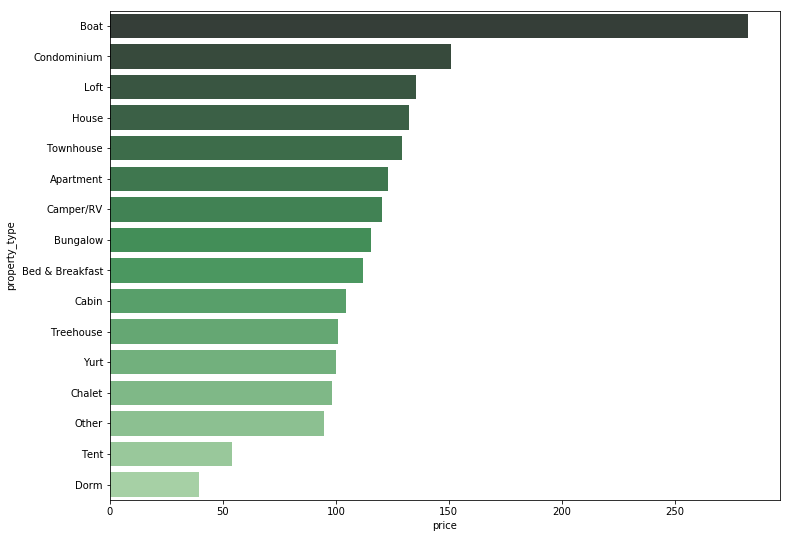

In [101]:
plot_price('property_type',df_1)

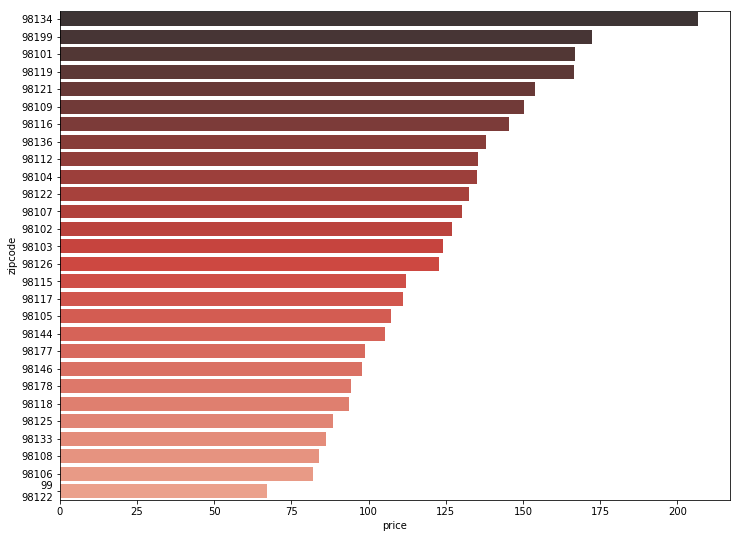

In [102]:
plot_price('zipcode',df_1, "Reds_d")

### 7. Question 2: What are the some of the popular amenities that are offered in the Airbnb rentals in Seattle?



In [103]:
amenities_separate_df.columns

Index(['24Hour_Checkin', 'Air_Conditioning', 'Breakfast',
       'BuzzerWireless_Intercom', 'Cable_TV', 'Carbon_Monoxide_Detector',
       'Cats', 'Dogs', 'Doorman', 'Dryer', 'Elevator_in_Building',
       'Essentials', 'FamilyKid_Friendly', 'Fire_Extinguisher',
       'First_Aid_Kit', 'Free_Parking_on_Premises', 'Gym', 'Hair_Dryer',
       'Hangers', 'Heating', 'Hot_Tub', 'Indoor_Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop_Friendly_Workspace', 'Lock_on_Bedroom_Door',
       'Other_pets', 'Pets_Allowed', 'Pets_live_on_this_property', 'Pool',
       'Safety_Card', 'Shampoo', 'Smoke_Detector', 'Smoking_Allowed',
       'Suitable_for_Events', 'TV', 'Washer', 'Washer__Dryer',
       'Wheelchair_Accessible', 'Wireless_Internet'],
      dtype='object')

In [104]:
amenities_separate_df.sum().sort_values(ascending=False).head(25)

Wireless_Internet             3667
Heating                       3627
Kitchen                       3423
Smoke_Detector                3281
Essentials                    3237
Dryer                         2997
Washer                        2992
Internet                      2811
Shampoo                       2670
TV                            2574
Carbon_Monoxide_Detector      2485
Fire_Extinguisher             2196
Free_Parking_on_Premises      2167
FamilyKid_Friendly            1963
First_Aid_Kit                 1680
Cable_TV                      1446
Indoor_Fireplace               886
Pets_live_on_this_property     883
Hangers                        846
Elevator_in_Building           785
Hair_Dryer                     774
Laptop_Friendly_Workspace      745
Iron                           742
Safety_Card                    727
Air_Conditioning               677
dtype: int64

In [105]:
df_amen = amenities_separate_df.sum().sort_values(ascending=False).head(25).to_frame()

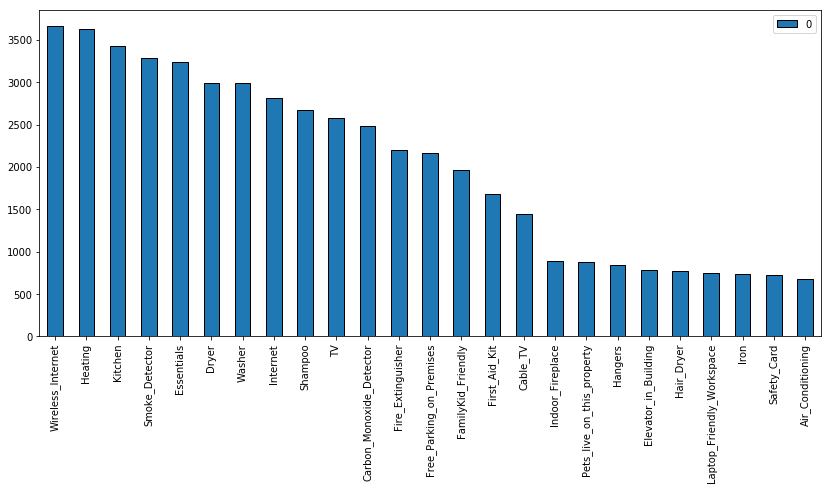

In [106]:
df_amen.plot(kind = "bar", edgecolor='black',  figsize = (14,6))

The top amenities offered are Wireless_Internet, Heating and Kitchen. Air Conditioning is not showing up in the top amenities offered

I wanted to see how the amenities influenced the price so decided to see how they correlated to the price

In [107]:
df_price = listing[['id', 'price']].copy()

In [108]:
df_price['price']  = listing['price'].map(lambda x: float(x[1:-3].replace(",", "")))

In [109]:
df_amenities_subset = amenities_separate_df[[ 'Air_Conditioning', 
        'Cable_TV', 'Carbon_Monoxide_Detector',
        'Dryer', 'Elevator_in_Building',
       'Essentials', 'FamilyKid_Friendly', 'Fire_Extinguisher',
       'First_Aid_Kit', 'Free_Parking_on_Premises',  'Hair_Dryer',
       'Heating', 'Indoor_Fireplace', 'Internet', 
       'Kitchen', 
       'Pets_live_on_this_property', 
        'Shampoo', 'Smoke_Detector', 
      'TV', 'Washer', 
       'Wireless_Internet']]

In [110]:
(df_amenities_subset).shape

(3818, 21)

In [111]:
df_amenities_price =df_price.join(df_amenities_subset,how='left')

In [112]:
df_amenities_price.drop(columns=['id'], inplace=True) 


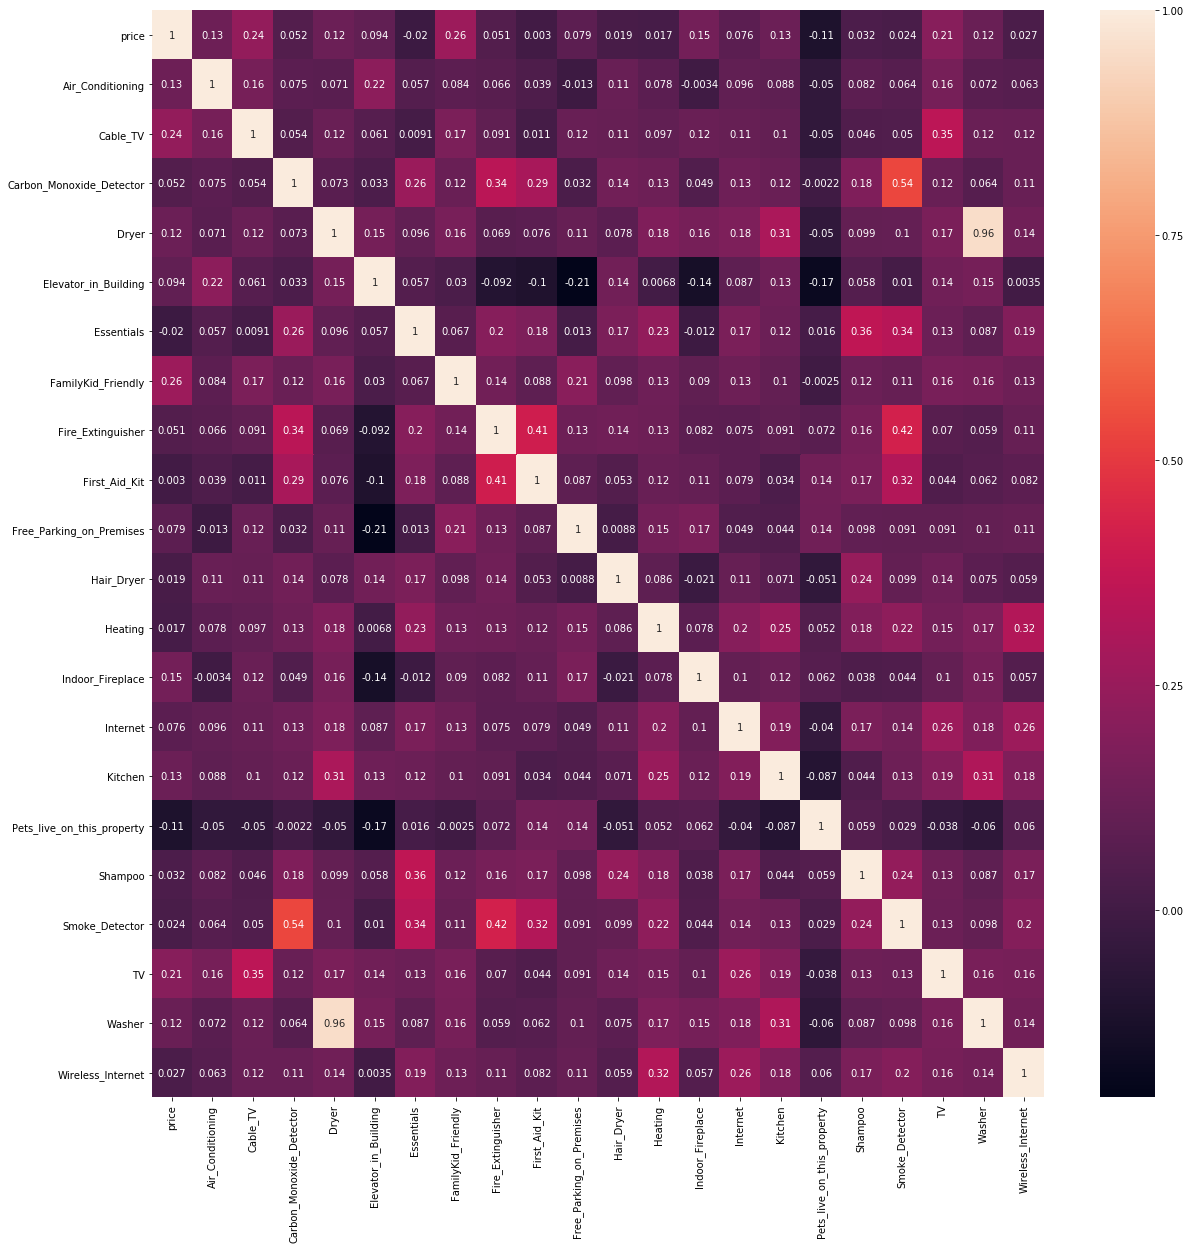

In [113]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_amenities_price.corr(), annot = True)

Based on the above heat map we can see Cable TV, Family Kid Friendly and TV show up more correlated to the price. 


### 8. Question - 3:  Which neighborhoods in Seattle have the highest and lowest rental prices?



We need to join the listings and the calendar to get this information


In [114]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [115]:
set(calendar.columns[calendar.isnull().mean() > 0])

{'price'}

Only the price has null values. Checking to see when the value is missing

In [116]:
calendar.groupby('available')['price'].count()

available
f         0
t    934542
Name: price, dtype: int64

The only time the price is missing is when the property is not available

In [117]:
listing_neighborhood = listing[['id','neighbourhood_cleansed',  'price']].copy()

In [118]:
df_nbd = pd.merge(calendar, listing_neighborhood, left_on='listing_id', right_on='id')
df_nbd.head()

,listing_id,date,available,price_x,id,neighbourhood_cleansed,price_y
0,241032,2016-01-04,t,$85.00,241032,West Queen Anne,$85.00
1,241032,2016-01-05,t,$85.00,241032,West Queen Anne,$85.00
2,241032,2016-01-06,f,NaN,241032,West Queen Anne,$85.00
3,241032,2016-01-07,f,NaN,241032,West Queen Anne,$85.00
4,241032,2016-01-08,f,NaN,241032,West Queen Anne,$85.00


Merging the prices into one column

In [119]:
df_nbd['price'] = df_nbd.price_y.combine_first(df_nbd.price_x)

In [120]:
df_nbd.head()

,listing_id,date,available,price_x,id,neighbourhood_cleansed,price_y,price
0,241032,2016-01-04,t,$85.00,241032,West Queen Anne,$85.00,$85.00
1,241032,2016-01-05,t,$85.00,241032,West Queen Anne,$85.00,$85.00
2,241032,2016-01-06,f,NaN,241032,West Queen Anne,$85.00,$85.00
3,241032,2016-01-07,f,NaN,241032,West Queen Anne,$85.00,$85.00
4,241032,2016-01-08,f,NaN,241032,West Queen Anne,$85.00,$85.00


In [121]:
df_nbd.drop(columns=[ 'id',  'price_x', 'price_y'], inplace=True) 

In [122]:
df_nbd['price']  = df_nbd['price'].map(lambda x: float(x[1:-3].replace(",", "")))

In [123]:
df_nbd.head()

,listing_id,date,available,neighbourhood_cleansed,price
0,241032,2016-01-04,t,West Queen Anne,85.0
1,241032,2016-01-05,t,West Queen Anne,85.0
2,241032,2016-01-06,f,West Queen Anne,85.0
3,241032,2016-01-07,f,West Queen Anne,85.0
4,241032,2016-01-08,f,West Queen Anne,85.0


In [124]:
df_nbd.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False).head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

In [125]:
df_nbd.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True).head(10)

neighbourhood_cleansed
Rainier Beach      68.555556
Olympic Hills      71.687500
South Delridge     74.666667
Georgetown         76.125000
North Delridge     76.375000
Mid-Beacon Hill    79.933333
Maple Leaf         80.261905
Riverview          80.500000
Victory Heights    81.466667
Bitter Lake        83.000000
Name: price, dtype: float64

In [126]:
df_nbd.groupby(['neighbourhood_cleansed'])['price'].max().sort_values(ascending=False).head(10)

neighbourhood_cleansed
Roosevelt             1000.0
Belltown               999.0
West Queen Anne        975.0
Southeast Magnolia     950.0
Westlake               775.0
Montlake               750.0
Portage Bay            750.0
East Queen Anne        749.0
Wallingford            680.0
Broadway               673.0
Name: price, dtype: float64

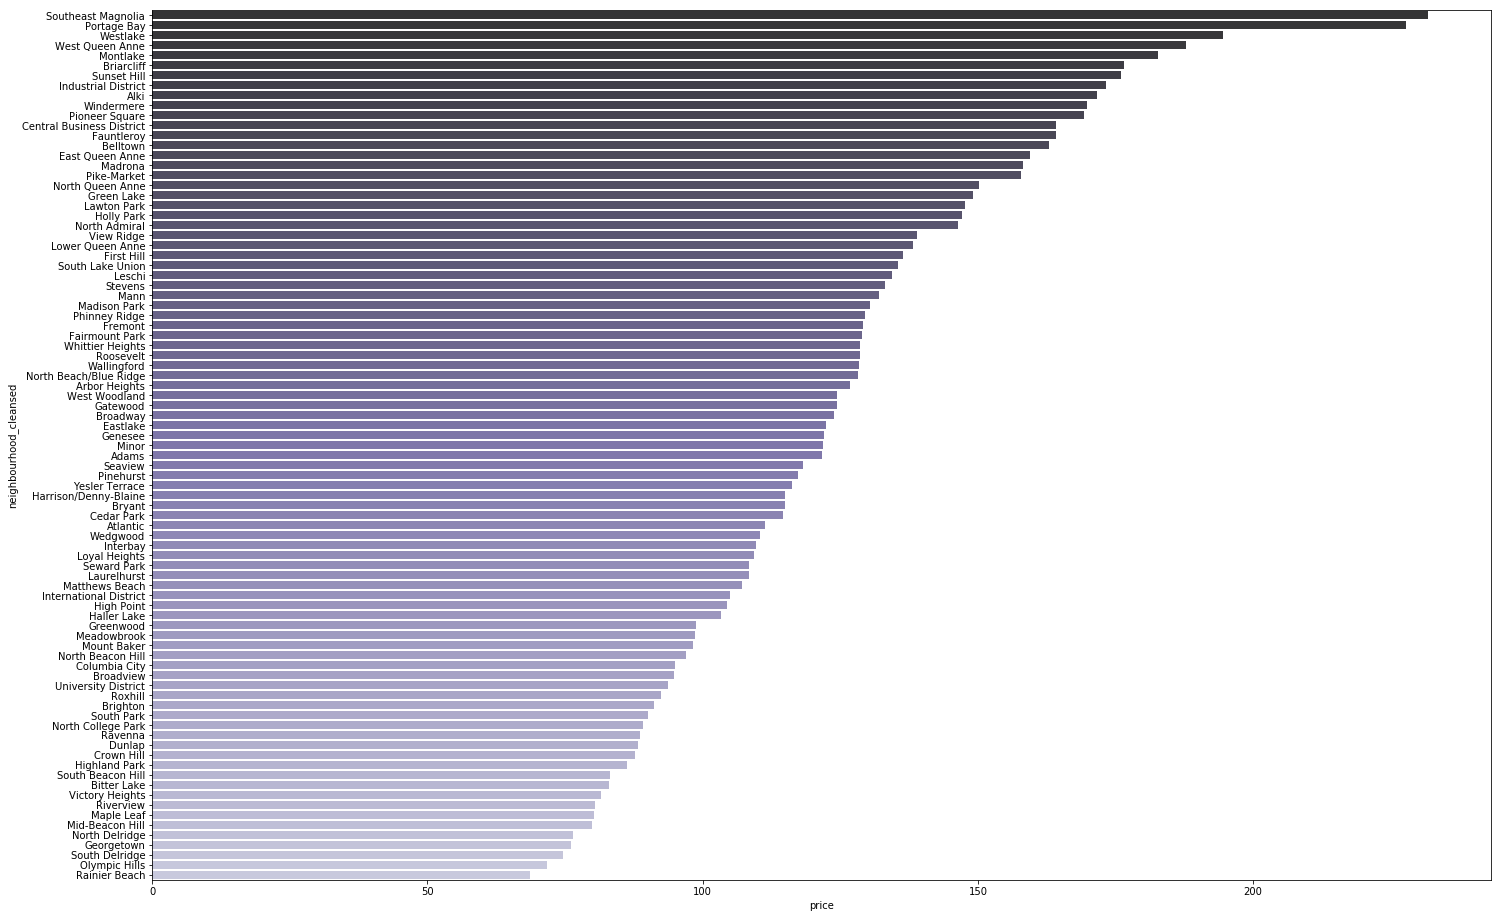

In [127]:
plot_price('neighbourhood_cleansed',df_1, "Purples_d", 24, 16)

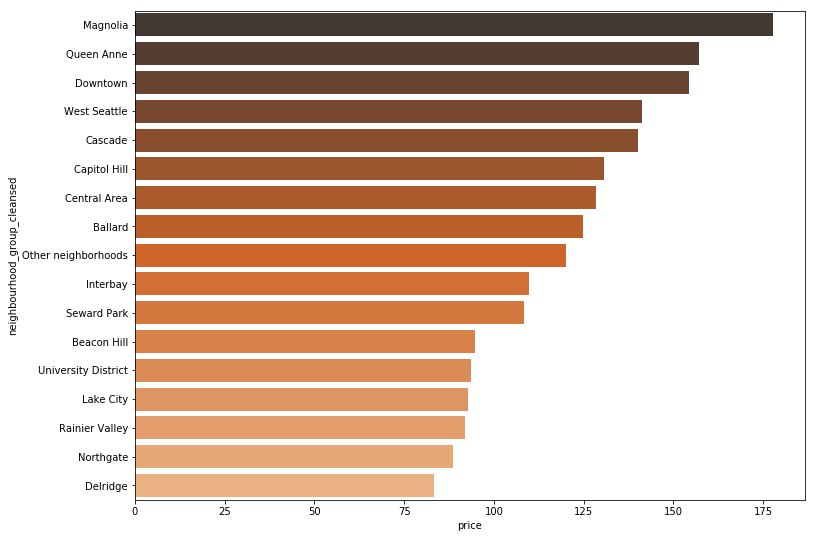

In [128]:
plot_price('neighbourhood_group_cleansed',df_1, "Oranges_d")

Magnolia, Queen Anne and Downtown are the most expensive neighborhoods groups and the cheapest neighborhoods are  Delridge, Northgate and Rainer Valley 

### 9. Question - 3: What are the number of Airbnb rental listings in the different neighborhoods of Seattle?


In [129]:
neighborhood_group_counts =listing.neighbourhood_group_cleansed.value_counts().sort_values(ascending = False)

In [130]:
neighborhood_group_counts

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

Text(0.5,1,'Number of Airbnb Listings in Neighbourhood Groups')

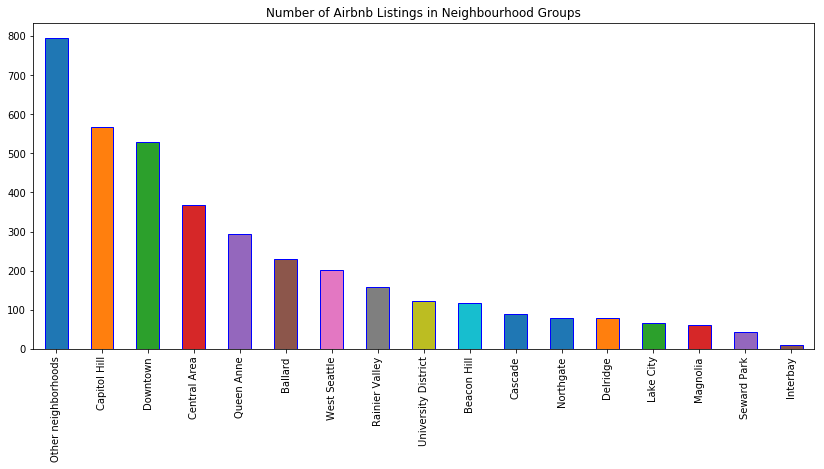

In [131]:
(neighborhood_group_counts).plot(kind = "bar", edgecolor='blue', figsize = (14,6))
plt.title("Number of Airbnb Listings in Neighbourhood Groups")

Capitol Hil, Downtown an Cenral Area have more listings than the others

### 10. Question - 5:  What are the most expensive and least expensive months  for the rentals in Seattle??



In [132]:
df_month = calendar.copy()
df_month = df_month.dropna()
df_month.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [133]:
#df_month['date'] = pd.to_datetime(df_month['date'])
df_month['price'] = df_month['price'].map(lambda x: float(x[1:-3].replace(",", "")))
df_month['year']=  df_month.date.str.slice(0, 4)
df_month['month']=  df_month.date.str.slice(5, 7)
df_month['YearMonth'] = df_month['year'].map(str) + df_month['month']

In [134]:
df_month.head()
df_month.drop( columns=['listing_id', 'date', 'available', 'year', 'month'], inplace=True) 

In [135]:
df_month.head()

,price,YearMonth
0,85.0,201601
1,85.0,201601
9,85.0,201601
10,85.0,201601
14,85.0,201601


df_month_mean=df_month.groupby('YearMonth').mean()
plot1=df_month_mean.plot(kind='bar')
plot1.set_xlabel('Year-Month')
plot1.set_ylabel('Average price of listings')
plot1

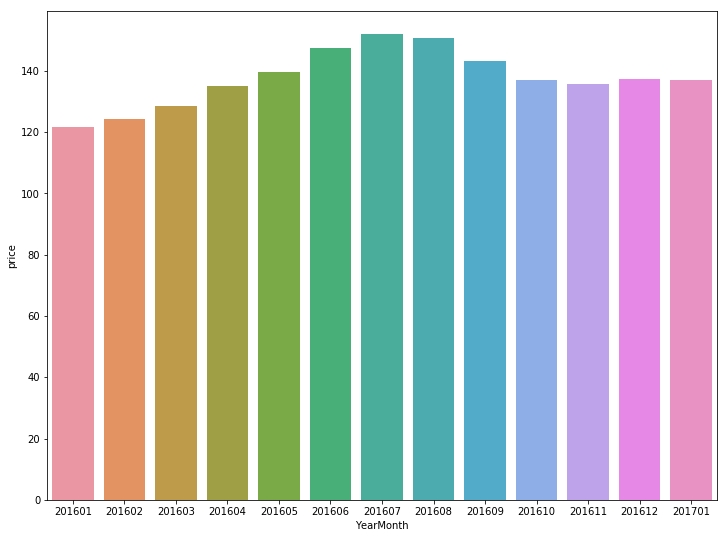

In [136]:
df_new = df_month.groupby('YearMonth').mean()[['price']]
df_new.reset_index(inplace=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(y='price',x= 'YearMonth', data=df_new.sort_values(by='price', ascending=False))

We have just over a years worth of data. We can see that the summer months of June, July, August are the more expensive months. It is interesting to see that the average price in Jan 2017 is higher than Jan 2016.